In [1]:
import os
import json
import numpy as np
import pandas as pd

In [2]:
extracted_json = pd.read_json('../output/ruthenia_parsed_v04.json', orient='records')

In [6]:
normalised = pd.io.json.json_normalize(extracted_json['content'][0], errors="ignore")

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [10]:
normalised

,b,u,i,fulltext
0,[Мезоамерика. ],"[Чатино, трики, сапотеки, миштеки, чинантеки, ...","[Зачем убиваете птиц для той, кто вам не мать?]","[Мезоамерика., Солнце и луна убивают чудовищно..."
1,[Ср. Гондурас – Панама.],[Брибри],None,"[(, Ср. Гондурас – Панама., Брибри, [собираясь..."
2,[Западная Амазония.],"[Ачуар, агуаруна]",None,"[Западная Амазония., Солнце выменивает у лиса ..."


In [16]:
normalised['fulltext']

0    [Мезоамерика., Солнце и луна убивают чудовищно...
1    [(, Ср. Гондурас – Панама., Брибри, [собираясь...
2    [Западная Амазония., Солнце выменивает у лиса ...
Name: fulltext, dtype: object

In [11]:
normalised['fulltext'].iloc[0]

['Мезоамерика.',
 'Солнце и луна убивают чудовищного змея или орла и забирают себе его сверкающие глаза.',
 'Чатино',
 '[змей]: Bartolomé 1979, № 2: 25; 1984: 12; Carrasco 1961: 46;',
 'трики',
 '[см. мотив A20; братья-близнецы живут в доме старухи, убивают ее мужа-Оленя; змея собирается сожрать мир, близнецы бросают ей в пасть раскаленные камни; посылают муху проверить, мертва ли змея; муха испражняется на ее левый глаз; младший брат берет себе более яркий правый глаз, старший – левый; братья идут, младший хочет пить; старший добывает воду как только младший соглашается поменяться глазами; Г. приходит к близнецам; они ее усыпляют и насилуют, нацепив камни на пенисы; убегают на небо, старший становится Солнцем, младший – Месяцем; он проглотил кролика, тот теперь виден на нем; птицы будят Г., она в крови; бросает вслед близнецам детали своего ткацкого станка (превращаются в созвездие Тельца) и сандалии (превращаются в Плеяды); сама Г. становится духом паровой бани]: Hollenbach 1977: 143

In [36]:
text_len = []
for i in range(len(extracted_json['content'])):
    norma = pd.io.json.json_normalize(extracted_json['content'][i], errors="ignore")['fulltext']
    for j in range(len(norma)):
        if norma.iloc[j]:
            for k in norma.iloc[j]:
                text_len.append(len(k))

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

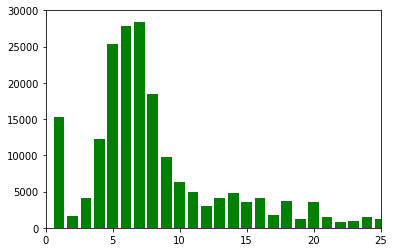

In [51]:
count = Counter(text_len)
plt.bar(list(count.keys()), count.values(), color='g')
plt.xlim(0, 25)
plt.ylim(0, 30000)
plt.show()

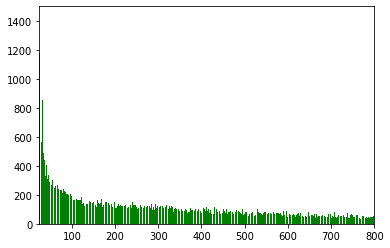

In [54]:
plt.bar(list(count.keys()), count.values(), color='g')
plt.xlim(25, 800)
plt.ylim(0, 1500)
plt.show()

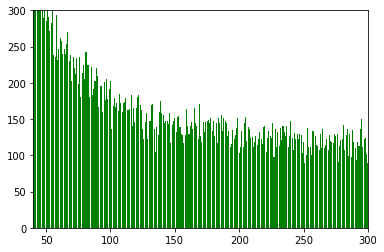

In [56]:
plt.bar(list(count.keys()), count.values(), color='g')
plt.xlim(40, 300)
plt.ylim(0, 300)
plt.show()

In [183]:
texts_list = []
for i in range(len(extracted_json['content'])):
    norma = pd.io.json.json_normalize(extracted_json['content'][i], errors="ignore")['fulltext']
    for j in range(len(norma)):
        if norma.iloc[j]:
            for k in norma.iloc[j]:
                if len(k) > 100 and re.match(r'\[', k):
                    texts_list.append(k)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
texts_list

['[см. мотив A20; братья-близнецы живут в доме старухи, убивают ее мужа-Оленя; змея собирается сожрать мир, близнецы бросают ей в пасть раскаленные камни; посылают муху проверить, мертва ли змея; муха испражняется на ее левый глаз; младший брат берет себе более яркий правый глаз, старший – левый; братья идут, младший хочет пить; старший добывает воду как только младший соглашается поменяться глазами; Г. приходит к близнецам; они ее усыпляют и насилуют, нацепив камни на пенисы; убегают на небо, старший становится Солнцем, младший – Месяцем; он проглотил кролика, тот теперь виден на нем; птицы будят Г., она в крови; бросает вслед близнецам детали своего ткацкого станка (превращаются в созвездие Тельца) и сандалии (превращаются в Плеяды); сама Г. становится духом паровой бани]: Hollenbach 1977: 143; 1980, № 8.26-8.37: 463-468;',
 '[двое сирот мальчик-Солнце и девочка-Луна живут у Sus Ley ("бесплодная женщина"); охотятся, но та все отдает своему старому мужу Gol Gisa\'; он живет в лесу, ни

In [185]:
import re

In [192]:
texts_list[3]

'[Солнце, Месяц и Лис купаются в реке, оставляют глаза на берегу; Солнце выходит первым, уносит глаза Лиса; теперь у него яркие глаза, а Лису пришлось взять обыкновенные, которые были у Солнца]: Mowitz 1978: 17;'

In [193]:
re.findall(r'\[(.*)\]', texts_list[3])

['Солнце, Месяц и Лис купаются в реке, оставляют глаза на берегу; Солнце выходит первым, уносит глаза Лиса; теперь у него яркие глаза, а Лису пришлось взять обыкновенные, которые были у Солнца']

In [196]:
re.findall(r'(\:.*?)\[', texts_list[3])

[]

In [213]:
re.findall(r'(\:.*?)*$', texts_list[3])[0]

' 17;'

In [211]:
re.findall(r'(\:.*?):', texts_list[3])

[': Mowitz 1978']

In [221]:
clear_list = []
for i in texts_list:
    a = re.findall(r'(\:.*?)\[', i)
    b = re.findall(r'(\:.*?)*$', i)[0]
    c = re.findall(r'(\:.*?):', i)
#     i = re.findall(r'\[(.*)\]', i)
    if a:
        for j in a:
            i = i.replace(j, ' ')
    if b:
        i = i.replace(b, ' ')
    if c:
        for k in c:
            i = i.replace(k, ' ')
    i = i.replace('[', ' ')
    i = i.replace(']', '.')
    i = i.strip()
    clear_list.append(i)

In [222]:
clear_list

['см. мотив A20; братья-близнецы живут в доме старухи, убивают ее мужа-Оленя; змея собирается сожрать мир, близнецы бросают ей в пасть раскаленные камни; посылают муху проверить, мертва ли змея; муха испражняется на ее левый глаз; младший брат берет себе более яркий правый глаз, старший – левый; братья идут, младший хочет пить; старший добывает воду как только младший соглашается поменяться глазами; Г. приходит к близнецам; они ее усыпляют и насилуют, нацепив камни на пенисы; убегают на небо, старший становится Солнцем, младший – Месяцем; он проглотил кролика, тот теперь виден на нем; птицы будят Г., она в крови; бросает вслед близнецам детали своего ткацкого станка (превращаются в созвездие Тельца) и сандалии (превращаются в Плеяды); сама Г. становится духом паровой бани. : 143; 1980, № 8.26-8.37',
 'двое сирот мальчик-Солнце и девочка-Луна живут у Sus Ley ("бесплодная женщина"); охотятся, но та все отдает своему старому мужу Gol Gisa\'; он живет в лесу, ничего не делает; Св. Антон вс

In [223]:
len(clear_list)

45412

In [224]:
clear_list[4567]

'мать девочки Piri-ere-ua ("неотделимая") и ее брата ловит поздно вечером рыбу, приносит, готовит и ест вместе с мужем; они думают, что дети спят; те обижены, убегают из дома, брат прыгает на небо, сестра цепляется за его пояс; родители напрасно пытаются их догнать; все четверо – звезды в созвездии Скорпиона (брат и сестра - двойная звезда); по появлению этого созвездия на заходе солнца в середине декабря отсчитывали новый год. : 40-42 (пересказ в Williamson 1933(1)'